 ## **Load the Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("heart.csv")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## **EDA**

In [3]:
df.shape

(918, 12)

In [4]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [7]:
for col in df.columns:
    if df[col].nunique() < 10:
        print(col)
        print(df[col].unique(), "\n")

Sex
['M' 'F'] 

ChestPainType
['ATA' 'NAP' 'ASY' 'TA'] 

FastingBS
[0 1] 

RestingECG
['Normal' 'ST' 'LVH'] 

ExerciseAngina
['N' 'Y'] 

ST_Slope
['Up' 'Flat' 'Down'] 

HeartDisease
[0 1] 



In [8]:
df.select_dtypes(["int64", "float64"]).corr()["HeartDisease"].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

## **EDA with visualizations**

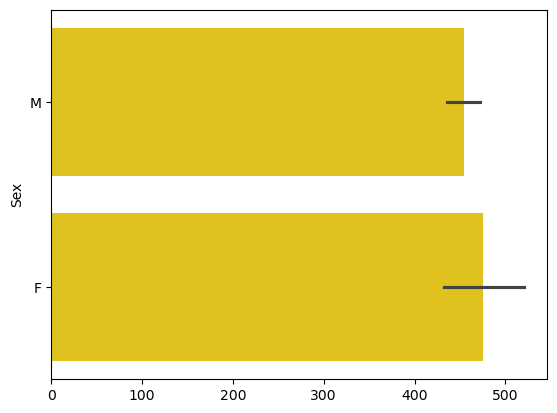

In [9]:
sns.barplot(data=df["Sex"], color="gold")
plt.show()

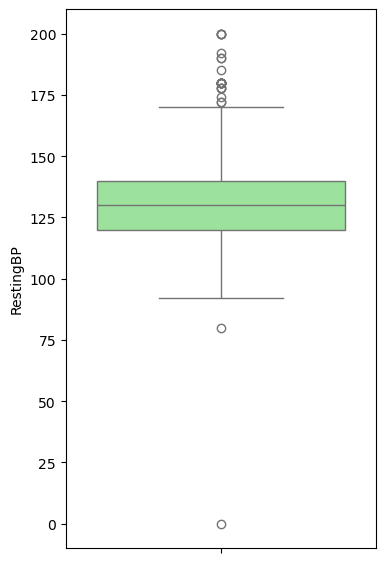

In [10]:
plt.figure(figsize=(4, 7))
sns.boxplot(data=df["RestingBP"], color="lightgreen")
plt.show()

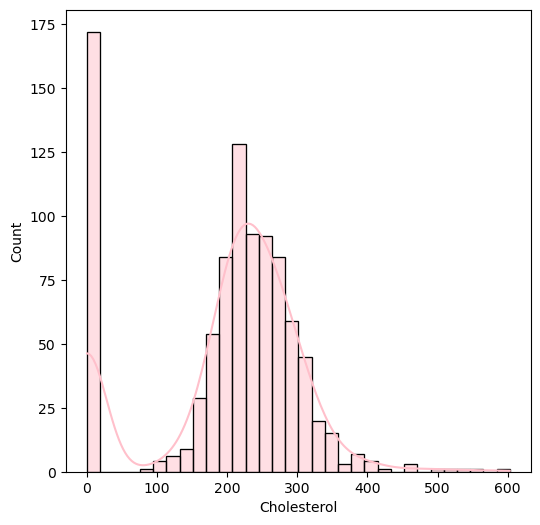

In [11]:
plt.figure(figsize=(6, 6))
sns.histplot(data=df["Cholesterol"], color="pink", kde=True)
plt.show()

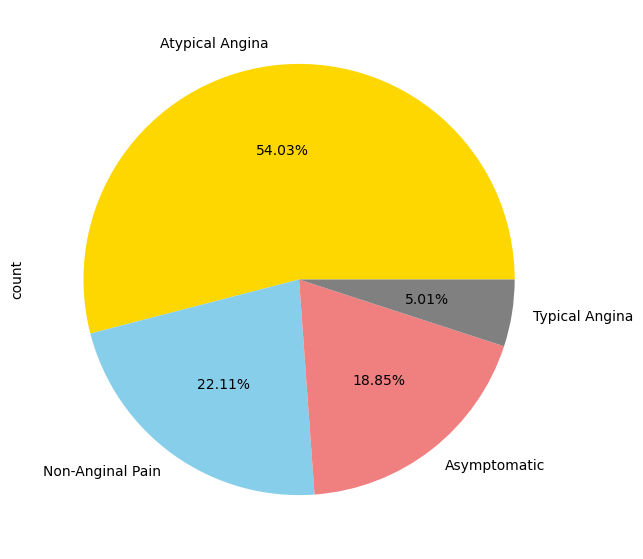

In [12]:
chest_pain_count = df["ChestPainType"].value_counts()
plt.figure(figsize=(7, 7))

chest_pain_count.plot(kind="pie",
                      labels=['Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic', 'Typical Angina'],
                      colors=["gold", "skyblue", "lightcoral", "gray"],
                      autopct="%.2f%%")

plt.show()

## **Data Preprocessing**

In [13]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df["Cholesterol"].value_counts()

Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [16]:
df['Cholesterol'] = df["Cholesterol"].replace(0, np.nan)

In [17]:
cholesterol_mean = df["Cholesterol"].mean()

In [18]:
df["Cholesterol"].fillna(cholesterol_mean, inplace=True)

In [19]:
df["Cholesterol"].value_counts()

Cholesterol
244.635389    172
254.000000     11
223.000000     10
220.000000     10
230.000000      9
             ... 
392.000000      1
316.000000      1
153.000000      1
466.000000      1
131.000000      1
Name: count, Length: 222, dtype: int64

In [20]:
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [21]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0


In [22]:
X = df.drop(columns="HeartDisease")
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Classification Baseline**

### **Logistic Regression**

In [23]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

In [24]:
logistic_accuracy = accuracy_score(y_pred, y_test)
logistic_precision = precision_score(y_pred, y_test)
logistic_recall = recall_score(y_pred, y_test)
logistic_f1 = f1_score(y_pred, y_test)

In [25]:
print(f"The accuracy of the logistic model is {logistic_accuracy:.3f}")
print(f"The percision score of the logistic model is {logistic_precision:.3f}")
print(f"The recall score of the logistic model is {logistic_recall:.3f}")
print(f"The f1 score of the logistic model is {logistic_f1:.3f}")

The accuracy of the logistic model is 0.837
The percision score of the logistic model is 0.888
The recall score of the logistic model is 0.841
The f1 score of the logistic model is 0.864


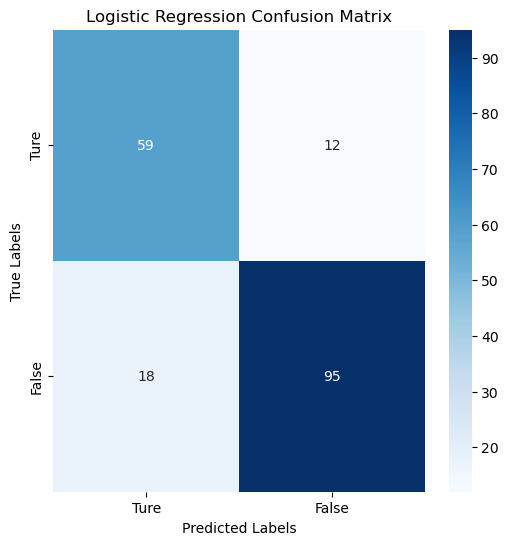

In [26]:
labels = ["Ture", "False"]
cm = confusion_matrix(y_pred, y_test)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

### **Random Forest Classifier**